# Plotting with Hypertools! (hyp.plot)

The plotting feature allows for data reduction and visualization with a single command.  

You can simply pass your data to the plot feature, utilizing default settings to reduce to 3D (via principal component analysis) and plot (line plot), or pass arguments specificying the data reduction techniques as well as plot aesthetics.  Let's explore!

## Import the package

In [1]:
import hypertools as hyp

## Load your data

In this case, we have used one of the sample datasets built into the package

In [2]:
mushrooms = hyp.load('mushrooms')

We can peek at the first few rows of the dataframe using the pandas feature 'head(n)'

In [3]:
mushrooms.head(n=5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Plot the data with default settings

Hypertools can plot your high-dimensional data quickly and easily with little user-generated input. If you use the default settings, you will see that the package automatically reduces your data via principal component analysis (if dimensions > 3) and plots in 3d. 

The default is to output a line connecting the datapoints (useful for timecourse visualizations), but, in this case, showing individual points is more intuitive ( thus we employ '.' )

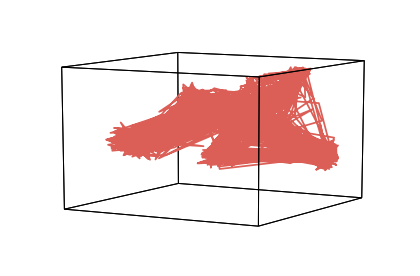

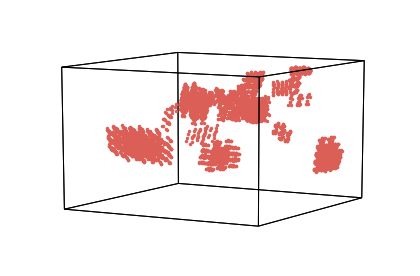

In [4]:
geo = hyp.plot(mushrooms) # plots a line
geo = hyp.plot(mushrooms, '.') # plots points

## Plotting in 2D 

We can also opt to plot high dimensional data in two dimensional space, rather than 3D, by passing the 'ndims' argument.

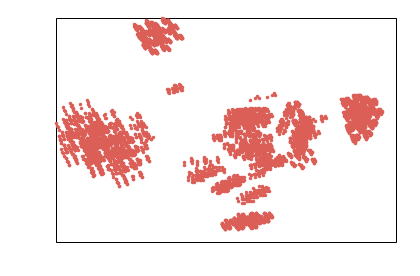

In [5]:
geo = hyp.plot(mushrooms, '.', ndims=2)

## Data Reduction Options

To explore a data reduction method aside from the default (PCA), call the 'reduce' argument. 

Here, we pass the reduce argument a string.

Accepted reduction models: PCA, IncrementalPCA, SparsePCA, MiniBatchSparsePCA, KernelPCA, FastICA, FactorAnalysis, TruncatedSVD, DictionaryLearning, MiniBatchDictionaryLearning, TSNE, Isomap, SpectralEmbedding, LocallyLinearEmbedding, MDS

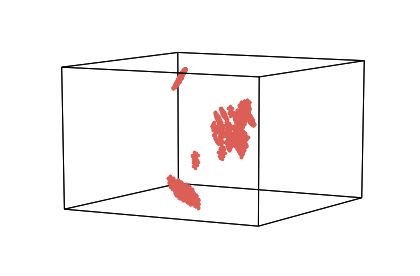

In [6]:
geo = hyp.plot(mushrooms, '.', reduce='SparsePCA')

For finer control of the parameters, you can pass the reduce argument a dictionary (see scikit learn documentation about paramter options for specific reduction techniques).

In [7]:
# code not working?
# geo = hyp.plot(mushrooms, '.', reduce={'model' : 'PCA', 'params' : {'whiten' : True}})

## Coloring by group

To color your datapoints by group labels, you can call the group argument. It accepts strings, ints, and floats, or a list of these. You must pass group the same number of labels as you have rows in your data matrix.

If you would like to leave some data unlabeled, labelling only a subset, you may use None as the label for the unlabeled datapoints. 

Here, we label the data in five different chunks of equal size (size #points / 5) for simplicity. Note that we pass ints, strings, floats, and None in the same list to the group argument.

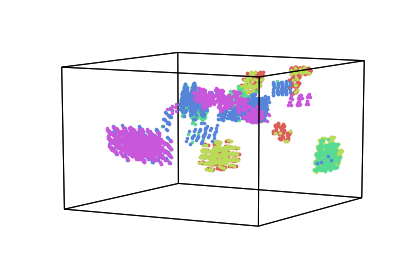

In [19]:
split = int(mushrooms.shape[0]/ 5)

groupings = [1]*split + ['two']*split + [3.0]*split + [None]*split + ['four']*split

geo_group = hyp.plot(mushrooms, '.', group=groupings)

### Legend

When coloring by group, you may want a legend to indicate group type. Passing legend=True will generate the legend based on your groupings. 

Note how the Legend handle ints, strings, floats, and None.

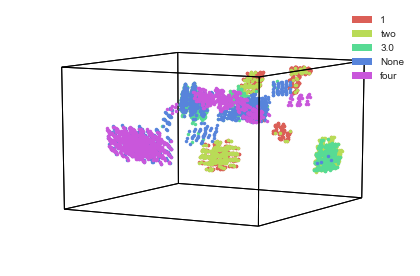

In [31]:
split = int(mushrooms.shape[0]/5)

groupings = [1]*split + ['two']*split + [3.0]*split + [None]*split + ['four']*split

geo_group = hyp.plot(mushrooms, '.', group=groupings, legend=True)

## Labeling Plotted Points

The labels argument accepts a list of labels for each point, which must be dimensionality of data (x). If no label is wanted for a particular point, simply input None. In this example, we have made use of None in order to label only three points of interest (the first, second, and last in our set). 

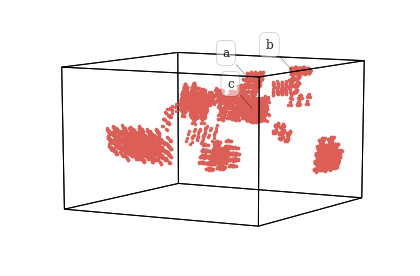

In [18]:
num_unlabeled = int(mushrooms.shape[0])-3

labeling = ['a','b'] + [None]*num_unlabeled + ['c']

label = hyp.plot(mushrooms, '.', labels = labeling)